# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">  Academic 📘 Dataset Exploration and Classification 📈</p>

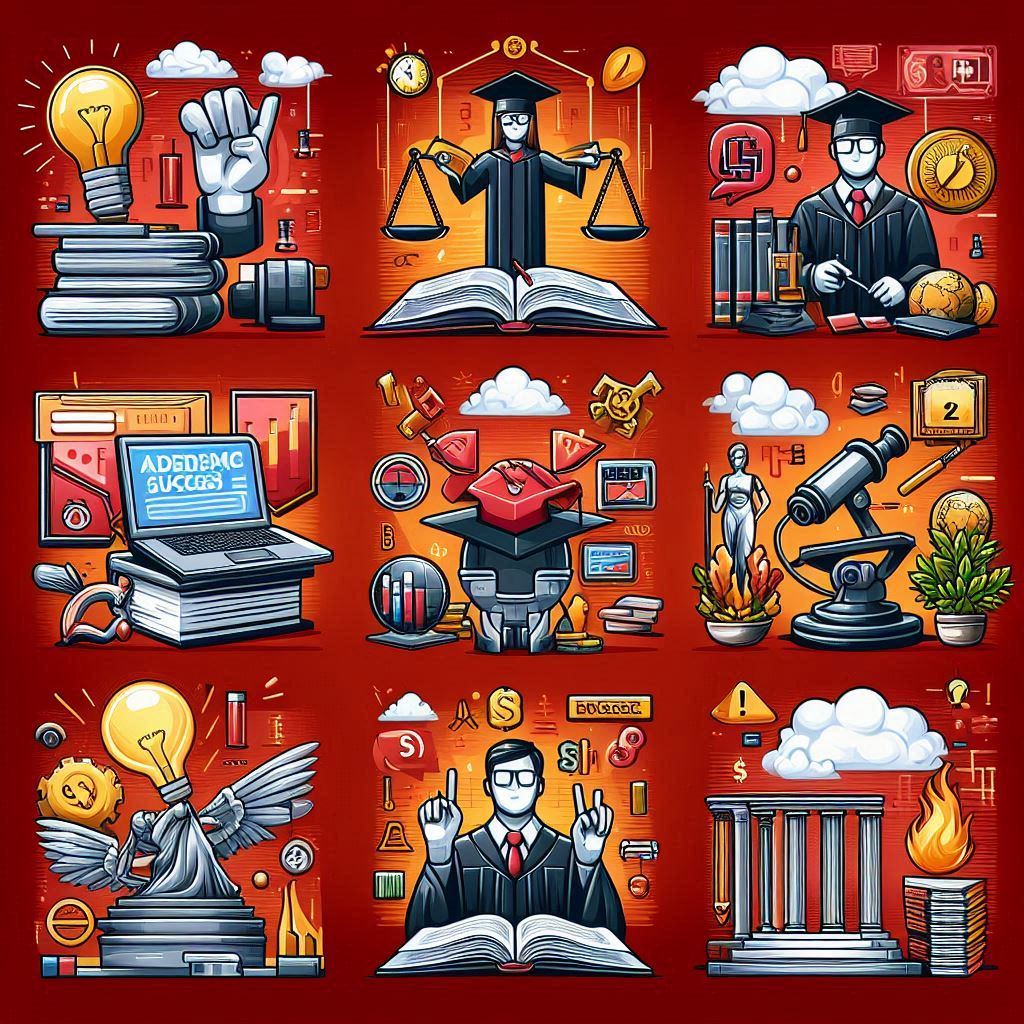

<div style='border: 3px solid none; background-color: #D9514E ;padding:20px; margin-top: 20px;'>
    <h1 style ='color : #E6E6FA ; font-weight: bold'>Aim</h1>
    <p style="font-family: Century Gothic; font-size: 18px;color : #E6E6FA ">
        - I made this version for my practice, so the start is very basic. Data is pure from null values; only some duplicates were present, which were removed.
        <br><br>
        - The EDA version contains just visualizations, not any observations.
        <br><br>
        - The normalization is done with the help of Quantile Transformer.
        <br><br>
        - Then the parameters are tuned by Optuna.
    </p>
</div>

# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">About Data</p>

<div style='border: 3px solid none; background-color: #D9514E ;padding:20px;'>
    <h1 style ='color : #E6E6FA ; font-weight: bold'>Dataset Overview</h1>
    <p style="font-family: Century Gothic; font-size: 18px;color : #E6E6FA ">
        The dataset for this competition (both train and test) was generated from a deep learning model trained on the Predict Students' Dropout and Academic Success dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance. Please refer to the original dataset for feature explanations.
        <br><br>
        It contains the following files:
        <br><br>
        📁 train.csv - the training dataset; Target is the categorical target
        <br>
        📁 test.csv - the test dataset; your objective is to predict the class of Target for each row
        <br>
        📁 sample_submission.csv - a sample submission file in the correct format
    </p>
</div>

# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">About Author</p>

<div style='border: 4px solid none; background-color:#D9514E; padding:20px;'>
    <div style="float: right; margin-left: 50px;">
        <img src="https://media.licdn.com/dms/image/D4D03AQEho5bPVChHpA/profile-displayphoto-shrink_800_800/0/1712892057663?e=1721865600&v=beta&t=rMB5UOlXPtXLEDBJZ9kHFKZAGe5-UwB5L9g_a5vFHfc" alt="Your Image" width="300px" style="border: 10px solid #E6E6FA; box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.1);">
    </div>
    <p style="font-family: Century Gothic; font-size: 18px; color : #E6E6FA;">
        😁 Hi Friends! 👋
        <br><br>
        My name is <b>Muhammad Abdullah</b>.
        <br> I am proficient in <b>Python</b>, <b>Data Science</b>, and <b>machine learning</b>, a student of <b>artificial intelligence</b>, and currently learning and working on <b>Plotting</b> projects.
        <br><br>
        Let's connect!
        <br><br>
        <a href="https://www.linkedin.com/in/muhammad-abdullah-6b84b4297/" target="_blank" style="color: #E6E6FA; text-decoration: none;">LinkedIn</a>
        <br>
        <a href="https://github.com/muhammadabdullah0303" target="_blank" style="color: #E6E6FA; text-decoration: none;">GitHub</a>        
    </p>
</div>

# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">Import Utilitz</p>

In [21]:
# Import Basis
import pandas as pd 
import optuna
import math
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from matplotlib.colors import LinearSegmentedColormap
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import *
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

palette = [
    "#D9514E",  # Danger Red
    "#2A2B2D",  # Tap Shoe
    "#2DA8D8",  # Blue Blossom
    "#D7A9E3",  # Light Purple
    "#8BBEE8",  # Light Blue
    "#A8D5BA",  # Light Green
    "#F9A602",  # Vibrant Orange
    "#6A0572",  # Deep Violet
    "#39FF14",  # Neon Green
    "#F67280",  # Coral Pink
    "#C06C84",  # Mulberry
    "#355C7D"   # Dark Slate Blue
]

custom_palette = [
    "#D9514E",  # Danger Red
    "#2A2B2D",  # Tap Shoe
    "#2DA8D8",  # Blue Blossom
    "#D7A9E3",  # Light Purple
    "#8BBEE8",  # Light Blue
    "#A8D5BA",  # Light Green
    "#F9A602",  # Vibrant Orange
    "#6A0572",  # Deep Violet
    "#39FF14",  # Neon Green
    "#F67280",  # Coral Pink
    "#C06C84",  # Mulberry
    "#355C7D"   # Dark Slate Blue
]


# Intlize Colors
HEAD = '#D9514E'
TEXT = '#2DA8D8'

# Text Styling
def print_unique_header(heading,heading_color=HEAD, text_color=TEXT):
    def color_text(text, hex_color):
        # Convert hex color to RGB
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
        # Apply ANSI escape code for the given RGB color
        return f"\033[38;2;{rgb[0]};{rgb[1]};{rgb[2]}m{text}\033[0m"

    bright = "\033[1m"
    reset = "\033[0m"

    total_width = len(heading) + 20
    left_space = (total_width - len(heading)) // 2
    right_space = total_width - len(heading) - left_space

    print("\n" + color_text("╭" + "─" * total_width + "╮", heading_color)) 
    print(color_text(f"│{' ' * left_space}{'▲'}{' ' * right_space}", heading_color) + reset)
    print(color_text(f"│{' ' * left_space}", heading_color) + color_text(heading, text_color) + color_text(f"{' ' * right_space}│", heading_color) + reset)
    print(color_text(f"│{' ' * left_space}{'▼'}{' ' * right_space}", heading_color) + reset)
    print(color_text("╰" + "─" * total_width + "╯", heading_color))

def print_boxed_zigzag_heading(heading, heading_color=HEAD, text_color=TEXT):
    def color_text(text, hex_color):
        # Convert hex color to RGB
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
        # Apply ANSI escape code for the given RGB color
        return f"\033[38;2;{rgb[0]};{rgb[1]};{rgb[2]}m{text}\033[0m"

    bright = "\033[1m"
    reset = "\033[0m"

    heading_color_code = color_text("╭" + "─" * (len(heading) + 20) + "╮", heading_color)
    
    print("\n" + heading_color_code)
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"{color_text(f'│ {word} │', text_color)}{reset}")
        else:
            print(f"{color_text(f'│ {word}', text_color)}{reset}", end=" ")
    print(color_text("╰" + "─" * (len(heading) + 20) + "╯", heading_color))
    
def prinT(text, hex_color=TEXT):
    # Convert hex color to RGB
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
    # Apply ANSI escape code for the given RGB color
    colored_text = f"\033[38;2;{rgb[0]};{rgb[1]};{rgb[2]}m{text}\033[0m"
    print(colored_text)
print_unique_header("Setup Intilized")


╭───────────────────────────────────╮
│          ▲          
│          Setup Intilized          │
│          ▼          
╰───────────────────────────────────╯


# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">Quick Overview</p>

In [22]:
# Load Submission Data 
d_s = pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')
# Load test Data 
te_d = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
#Train Data 
tr_d = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')

# Original Data 
O_D = pd.read_csv("/kaggle/input/playgrounds4e06originaldata/original.csv")

# Dropping Id from  Train 
tr_d.drop(columns=['id'], inplace=True)
te_d.drop(columns=['id'], inplace=True)
O_D.drop(columns=['id'], inplace=True)

# Concat 
tr_d = pd.concat(objs=[tr_d, O_D])

In [23]:
# Drop Irreleveant 
tr_d.drop(labels='Daytime/evening attendance\t', axis=1, inplace=True)
# Fill Null Values 
most_frequent = tr_d['Daytime/evening attendance'].mode()[0]
tr_d['Daytime/evening attendance'].fillna(most_frequent, inplace=True)

<div style='border: 3px solid none; background-color: #D9514E ;padding:20px;'>
    <h1 style ='color : #E6E6FA ; font-weight: bold'>Function Overview</h1>
    <p style="font-family: Century Gothic; font-size: 18px;color : #E6E6FA ">
        The provided code defines two functions: <code>print_error(message)</code> and <code>D_O(train_df, border_color=HEAD, style_color=TEXT)</code>.
        <br><br>
        - <code>print_error(message)</code>: Raises a <code>ValueError</code> with the specified <code>message</code>.
        <br><br>
        - <code>D_O(train_df, border_color=HEAD, style_color=TEXT)</code>: This function is used to display various summaries and information about the training dataset.
        <br><br>
        The summaries include:
        <br><br>
        1. Head and Tail of the training dataset.
        <br>
        2. Shape of the training dataset.
        <br>
        3. Info of the training dataset.
        <br>
        4. Numerical summary of the training dataset.
        <br>
        5. Categorical and Numerical columns of the training dataset.
        <br>
        6. Null values and duplicates check in the training dataset.
    </p>
</div>

In [24]:
def print_error(message):
    raise ValueError(message)

def D_O(train_df, border_color=HEAD, style_color=TEXT):
    try:
        # Display head of the training dataset nicely
        print_unique_header("The Head Of Train Dataset is:")
        display(HTML(train_df.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {border_color};">').replace('<td>', f'<td style="color: {style_color};">')))
        print('\n')

        # Display tail of the training dataset nicely
        print_unique_header("The Tail Of Train Dataset is:")
        display(HTML(train_df.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {border_color};">').replace('<td>', f'<td style="color: {style_color};">')))
        print('\n')

        print_unique_header("Shape Data:")
        prinT(f'The Shape of the Train Data is {train_df.shape} |',)
        prinT(f'- 1. The No of Rows is {train_df.shape[0]} |',)
        prinT(f'- 2. The No of Cols is {train_df.shape[1]} |',)
        
        print('\n')
        
        print_unique_header("Info Of Train Data:")
        train_df.info()

        # Describe both numerical and categorical data
        print_unique_header("Numerical Summary of Train Data:")
        display(train_df.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', f'{style_color}')]}]))

        Cat_cols_train = [col for col in train_df.columns if train_df[col].dtype != 'float']
        print_unique_header("Categorical Columns of Train Data:")
        prinT(f'The Categorical Columns of Train Data are :\n {Cat_cols_train}',)

        N_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'float']
        print_unique_header("Numerical Columns of Train Data:")
        prinT(f'The Numerical Columns of Train Data are :\n {N_cols_train}')

        print_unique_header("Null Values in Train Data:")
        print(train_df.isnull().sum())

        print_unique_header("Duplicates Check in Train Data:")
        if train_df.duplicated().any():
            prinT(f'Duplicates exist in the train dataset.',)
        else:
            prinT(f'No Duplicates exist in the train dataset.',)
        
    except Exception as e:
        print_error(f"An error occurred: {str(e)}")

def D_O_test(test_df, border_color=HEAD, style_color=TEXT):
    try:
        # Display head of the test dataset nicely
        print_unique_header("The Head Of Test Dataset is:")
        display(HTML(test_df.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {border_color};">').replace('<td>', f'<td style="color: {style_color};">')))
        print('\n')

        # Display tail of the test dataset nicely
        print_unique_header("The Tail Of Test Dataset is:")
        display(HTML(test_df.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {border_color};">').replace('<td>', f'<td style="color: {style_color};">')))
        print('\n')

        print_unique_header("Shape Data:")
        prinT(f'The Shape of the Test Data is {test_df.shape} |',)
        prinT(f'- 1. The No of Rows is {test_df.shape[0]} |',)
        prinT(f'- 2. The No of Cols is {test_df.shape[1]} |',)
        
        print('\n')
        
        print_unique_header("Info Of Test Data:")
        test_df.info()

        # Describe both numerical and categorical data
        print_unique_header("Numerical Summary of Test Data:")
        display(test_df.describe().style.set_caption("Test Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', f'{style_color}')]}]))

        Cat_cols_test = [col for col in test_df.columns if test_df[col].dtype != 'float']
        print_unique_header("Categorical Columns of Test Data:")
        prinT(f'The Categorical Columns of Test Data are :\n {Cat_cols_test}',)

        N_cols_test = [col for col in test_df.columns if test_df[col].dtype == 'float']
        print_unique_header("Numerical Columns of Test Data:")
        prinT(f'The Numerical Columns of Test Data are :\n {N_cols_test}')

        print_unique_header("Null Values in Test Data:")
        print(test_df.isnull().sum())

        print_unique_header("Duplicates Check in Test Data:")
        if test_df.duplicated().any():
            prinT(f'Duplicates exist in the test dataset.',)
        else:
            prinT(f'No Duplicates exist in the test dataset.',)
        
    except Exception as e:
        print_error(f"An error occurred: {str(e)}")


In [25]:
# Data Overview
D_O(tr_d)
D_O_test(te_d)


╭─────────────────────────────────────────────────╮
│          ▲          
│          The Head Of Train Dataset is:          │
│          ▼          
╰─────────────────────────────────────────────────╯





╭─────────────────────────────────────────────────╮
│          ▲          
│          The Tail Of Train Dataset is:          │
│          ▼          
╰─────────────────────────────────────────────────╯





╭───────────────────────────────╮
│          ▲          
│          Shape Data:          │
│          ▼          
╰───────────────────────────────╯
The Shape of the Train Data is (80942, 37) |
- 1. The No of Rows is 80942 |
- 2. The No of Cols is 37 |



╭───────────────────────────────────────╮
│          ▲          
│          Info Of Train Data:          │
│          ▼          
╰───────────────────────────────────────╯
<class 'pandas.core.frame.DataFrame'>
Index: 80942 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  80942 non-null  int64  
 1   Application mode                                80942 non-null  int64  
 2   Application order                               80942 non-null  int64  
 3   Course                                          80942 non-null  int64  
 4   


╭──────────────────────────────────────────────────────╮
│          ▲          
│          Categorical Columns of Train Data:          │
│          ▼          
╰──────────────────────────────────────────────────────╯
The Categorical Columns of Train Data are :
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular




╭────────────────────────────────────────────────╮
│          ▲          
│          The Tail Of Test Dataset is:          │
│          ▼          
╰────────────────────────────────────────────────╯





╭───────────────────────────────╮
│          ▲          
│          Shape Data:          │
│          ▼          
╰───────────────────────────────╯
The Shape of the Test Data is (51012, 36) |
- 1. The No of Rows is 51012 |
- 2. The No of Cols is 36 |



╭──────────────────────────────────────╮
│          ▲          
│          Info Of Test Data:          │
│          ▼          
╰──────────────────────────────────────╯
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  51012 non-null  int64  
 1   Application mode                                51012 non-null  int64  
 2   Application order                               51012 non-null  int64  
 3   Course                                          51012 non-null  int64  
 4 


╭─────────────────────────────────────────────────────╮
│          ▲          
│          Categorical Columns of Test Data:          │
│          ▼          
╰─────────────────────────────────────────────────────╯
The Categorical Columns of Test Data are :
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd se

# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">EDA (Explorartary Data Analysis) </p>

<div style='border: 3px solid none; background-color: #D9514E ;padding:20px;'>
    <h1 style ='color : #E6E6FA ; font-weight: bold'>Function Overview</h1>
    <p style="font-family: Century Gothic; font-size: 18px;color : #E6E6FA ">
        The provided code defines a class named <code>Plotting_by_Abdullah</code>, which encapsulates several plotting methods.
        <br><br>
        The class has the following methods:
        <br><br>
        1. <code>__init__(self, DATA)</code>: Initializes the plotting class with the specified DataFrame <code>DATA</code>.
        <br><br>
        2. <code>scatter_plot_small(self, T_V, hue=None, palette=custom_palette)</code>: Generates scatter plots for numerical features against the target variable, with an optional hue parameter for categorical distinction.
        <br><br>
        3. <code>QUICK_SHOW(self, color_palette=None, H=True, B=True, C=True, P=True)</code>: Provides a quick overview of histograms, box plots, count plots, and pie charts for both numerical and categorical data.
        <br><br>
        4. <code>violin_plot(self, target_variable, palette=None)</code>: Generates violin plots for numerical features against the target variable.
        <br><br>
        5. <code>violin_plot_Category(self, target_variable, palette=None)</code>: Generates violin plots for categorical features against the target variable.
        <br><br>
        6. <code>only_HIST(self, columns, color=custom_palette[3])</code>: Generates histograms for the specified columns.
        <br><br>
        7. <code>only_BOX(self, palette=palette[0:3])</code>: Generates box plots for numerical features.
        <br><br>
        The class also includes a helper function <code>single_plot_distribution(column_name, dataframe)</code>, which generates a pie chart and a bar chart to visualize the distribution of a single categorical column.
    </p>
</div>


In [6]:
# Complete Plotting Class
class Plotting_by_Abdullah:
    def __init__(self, DATA):
        self.DATA = DATA 
        
#    # Scatter plot With Hue and Not Hue 
#     def scatter_plot_all(self, T_V, hue=None, palette=None):
#         # Num Cols 
#         num_cols = [col for col in self.DATA.columns if self.DATA[col].dtype != 'object' and self.DATA[col].dtype != 'category' and self.DATA[col].dtype != 'bool']

#         # Features Except T_V
#         FEATURE= [col for col in num_cols if col != T_V]
#         num_features = len(FEATURE)

#         # Calculate number of rows and columns for subplots
#         ncols = min(3, num_features) 
#         nrows = (num_features + ncols - 1) // ncols

#         # Create subplots
#         fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

#         # Assign colors from the custom palette
#         if palette is None:
#             colors = sns.color_palette() 
#         else:
#             colors = palette

#         # Plot each variable against the T_V
#         for i, (FE, color) in enumerate(zip(FEATURE, colors)):
#             if nrows == 1:
#                 ax = axes[i]
#             else:
#                 ax = axes.flatten()[i]

#             if hue:
#                 sns.scatterplot(x=self.DATA[FE], y=self.DATA[T_V], hue=self.DATA[hue], ax=ax, palette=palette)
#                 ax.set_title(f"{FE} vs {T_V} (Hue: {hue})")
#                 ax.set_xlabel(FE)
#                 ax.set_ylabel(T_V)
#             else:
#                 sns.scatterplot(x=self.DATA[FE], y=self.DATA[T_V], ax=ax, palette=palette)
#                 ax.set_title(f"{FE} vs {T_V}")
#                 ax.set_xlabel(FE)
#                 ax.set_ylabel(T_V)

#         # Hide empty subplots
#         for i in range(num_features, nrows * ncols):
#             if nrows == 1:
#                 fig.delaxes(axes[i])
#             else:
#                 fig.delaxes(axes.flatten()[i])

#         plt.tight_layout()
#         plt.show()

    def scatter_plot_small(self, T_V, hue=None, palette=custom_palette):
        # Identify numerical columns
        num_cols = [col for col in self.DATA.columns if self.DATA[col].dtype in ['int64', 'float64']]

        # Features except T_V
        FEATURE = [col for col in num_cols if col != T_V]
        num_features = len(FEATURE)

        # Calculate number of rows and columns for subplots
        ncols = min(3, num_features)
        nrows = (num_features + ncols - 1) // ncols

        # Create subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

        # Flatten axes array for easy indexing
        axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

        # Assign colors from the custom palette
        colors = palette

        # Plot each variable against the T_V
        for i, (FE, color) in enumerate(zip(FEATURE, colors)):
            ax = axes[i]
            if hue:
                sns.scatterplot(x=self.DATA[FE], y=self.DATA[T_V], hue=self.DATA[hue], ax=ax, palette=palette)
                ax.set_title(f"{FE} vs {T_V} (Hue: {hue})")
            else:
                sns.scatterplot(x=self.DATA[FE], y=self.DATA[T_V], ax=ax, color=color)
                ax.set_title(f"{FE} vs {T_V}")
            ax.set_xlabel(FE)
            ax.set_ylabel(T_V)

        # Hide any extra subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    # Quick Overview of Plotting
    def QUICK_SHOW(self, color_palette=None, H=True, B=True, C=True, P=True):
        
        # Set the color palette if provided, otherwise use default
        if color_palette:
            sns.set_palette(color_palette)

        # Data Types 
        num_cols = self.DATA.select_dtypes(include=['float', 'integer']).columns.tolist()
        cat_cols = self.DATA.select_dtypes(include=['object', 'category']).columns.tolist()

        # Error handling for data types
        if not all(col in self.DATA.columns for col in num_cols + cat_cols):
            raise ValueError("Columns provided must exist in the dataframe.")

        # Error handling for empty data
        if self.DATA.empty:
            raise ValueError("Dataframe is empty.")

        num_rows = len(num_cols)
        cat_rows = len(cat_cols)
        total_rows = max(num_rows, cat_rows)

        if total_rows == 0:
            raise ValueError("No columns provided for plotting.")

        # Subplots Configure
        fig, axes = plt.subplots(total_rows, 4, figsize=(6*4, 6*total_rows))
        plt.subplots_adjust(hspace=0.5)

        # Hist and Box Plots 
        for i, col in enumerate(num_cols):
            if i < num_rows:
                if H:
                    sns.histplot(self.DATA[col], ax=axes[i, 0], kde=True)
                    axes[i, 0].set_title(f'Histogram of {col}')
                    axes[i, 0].set_xlabel(col)
                    axes[i, 0].set_ylabel('Frequency')
                if not H:
                    axes[i, 0].set_visible(False)
                if B:
                    sns.boxplot(self.DATA[col], ax=axes[i, 1])
                    axes[i, 1].set_title(f'Box Plot of {col}')
                    axes[i, 1].set_xlabel(col)
                    axes[i, 1].set_ylabel('')
                else:
                    axes[i, 1].set_visible(False)
            else:
                for j in range(2):
                    axes[i, j].set_visible(False)
        # Pie and Count Plot 
        for i, col in enumerate(cat_cols, start=0):
            # Convert the categorical column to pandas categorical data
            self.DATA[col] = pd.Categorical(self.DATA[col])

            counts = self.DATA[col].value_counts()

            # Plot Bar Chart
            if C:
                sns.countplot(data=self.DATA, x=col, ax=axes[i, 2], order=self.DATA[col].value_counts().index)
                axes[i, 2].set_title(f'Count Plot of {col}')
                axes[i, 2].set_xlabel(col)
                axes[i, 2].set_ylabel('Count')
                axes[i, 2].tick_params(axis='x', rotation=45)
            if not C:
                axes[i, 2].set_visible(False)

            # Plot PIE Chart
            if P:
                axes[i, 3].pie(counts, labels=counts.index, autopct='%1.1f%%')
                axes[i, 3].set_title(f'Pie Plot of {col}')
                axes[i, 3].set_xlabel('')
                axes[i, 3].set_ylabel('')

            # Hide axes for PIE Plot if disabled
            if not P:
                axes[i, 3].set_visible(False)

        # Clear remaining empty subplots for categorical columns
        for j in range(cat_rows, total_rows):
            for k in range(2, 4):
                axes[j, k].set_visible(False)

        plt.tight_layout()
        plt.show()
        
    # Volion Plots   
    def violin_plot(self, target_variable, palette=None):
        # Select numerical columns
        numerical_columns = [col for col in self.DATA.columns if self.DATA[col].dtype != 'object' and self.DATA[col].dtype != 'category' and self.DATA[col].dtype != 'bool']

        # Determine the number of features
        num_features = len(numerical_columns)

        # Determine the number of rows and columns for subplots
        ncols = min(3, num_features)
        nrows = (num_features + ncols - 1) // ncols

        # Create subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
        plt.subplots_adjust(hspace=0.5)

        # Plot violin plots for each numerical column
        for i, column in enumerate(numerical_columns):
            if nrows == 1:
                ax = axes[i]
            else:
                ax = axes.flatten()[i]
            sns.violinplot(x=target_variable, y=column, data=self.DATA, ax=ax, palette=palette)
            ax.set_title(f"Violin plot of {column} by {target_variable}")
            ax.set_xlabel(target_variable)
            ax.set_ylabel(column)

        # Hide empty subplots
        for i in range(num_features, nrows * ncols):
            if nrows == 1:
                fig.delaxes(axes[i])
            else:
                fig.delaxes(axes.flatten()[i]) 

        plt.tight_layout()
        plt.show()

    def violin_plot_Category(self, target_variable, palette=None):
        # Select categorical columns
        categorical_columns = [col for col in self.DATA.columns if self.DATA[col].dtype == 'object' or self.DATA[col].dtype == 'category']

        # Determine the number of features
        num_features = len(categorical_columns)

        # Determine the number of rows and columns for subplots
        ncols = min(3, num_features)
        nrows = (num_features + ncols - 1) // ncols

        # Create subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
        plt.subplots_adjust(hspace=0.5)

        # Flatten axes
        axes = np.ravel(axes)

        # Plot violin plots for each categorical column
        for i, column in enumerate(categorical_columns):
            ax = axes[i]

            # Plot only if the axis exists
            if ax is not None:
                sns.violinplot(x=column, y=target_variable, data=self.DATA, ax=ax, palette=palette)
                ax.set_title(f"Violin plot of {target_variable} by {column}")
                ax.set_xlabel(column)
                ax.set_ylabel(target_variable)

        # Hide empty subplots
        for ax in axes[num_features:]:
            # Remove the axis if it exists
            if ax is not None:
                fig.delaxes(ax)

        plt.tight_layout()
        plt.show()
            # Function to Generate Histogram
    def only_HIST(self,columns, color=custom_palette[2]): 
        num_cols = len(self.DATA.columns)
        num_rows = math.ceil(num_cols / 3)  

        fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*4)) 

        for i, col in enumerate(columns):
            row = i // 3
            col_num = i % 3
            ax = axs[row, col_num] if num_rows > 1 else axs[col_num]

            ax.hist(self.DATA[col], bins=10, color=color, edgecolor='black')
            ax.set_title(col)
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')

        # Hide unused subplots
        for i in range(num_cols, num_rows*3):
            row = i // 3
            col_num = i % 3
            axs[row, col_num].axis('off')

        plt.tight_layout()
        plt.show()
        
    def only_BOX(self, palette=palette[0:3]):

        # Select only numeric columns
        NUM_COLS_F = self.DATA.select_dtypes(include=np.number).columns.tolist()

        # Determine the number of rows and columns for the subplots
        num_plots = len(NUM_COLS_F)
        num_cols = 3
        num_rows = (num_plots + 1) // num_cols

        # Create subplots
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
        axes = axes.flatten()  # Flatten to easily iterate over axes

        # Loop through each numerical column and create a box plot
        for i, col in enumerate(NUM_COLS_F):
            sns.boxplot(x=self.DATA[col], ax=axes[i], color=palette[i % len(palette)])
            axes[i].set_title(col)

        # Hide empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

print_unique_header("Function Intiltized")

# # Function to Plot Single Pie and Bar Plot
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]}) 

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,) 
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()


╭───────────────────────────────────────╮
│          ▲          
│          Function Intiltized          │
│          ▼          
╰───────────────────────────────────────╯



╭────────────────────────────────────────────╮
│          ▲          
│          Count Of Target Variable          │
│          ▼          
╰────────────────────────────────────────────╯



╭──────────────────────────────────────────────────────────────────────────────╮
│          ▲          
│          Relationship of Independent Variables With Target Variable          │
│          ▼          
╰──────────────────────────────────────────────────────────────────────────────╯


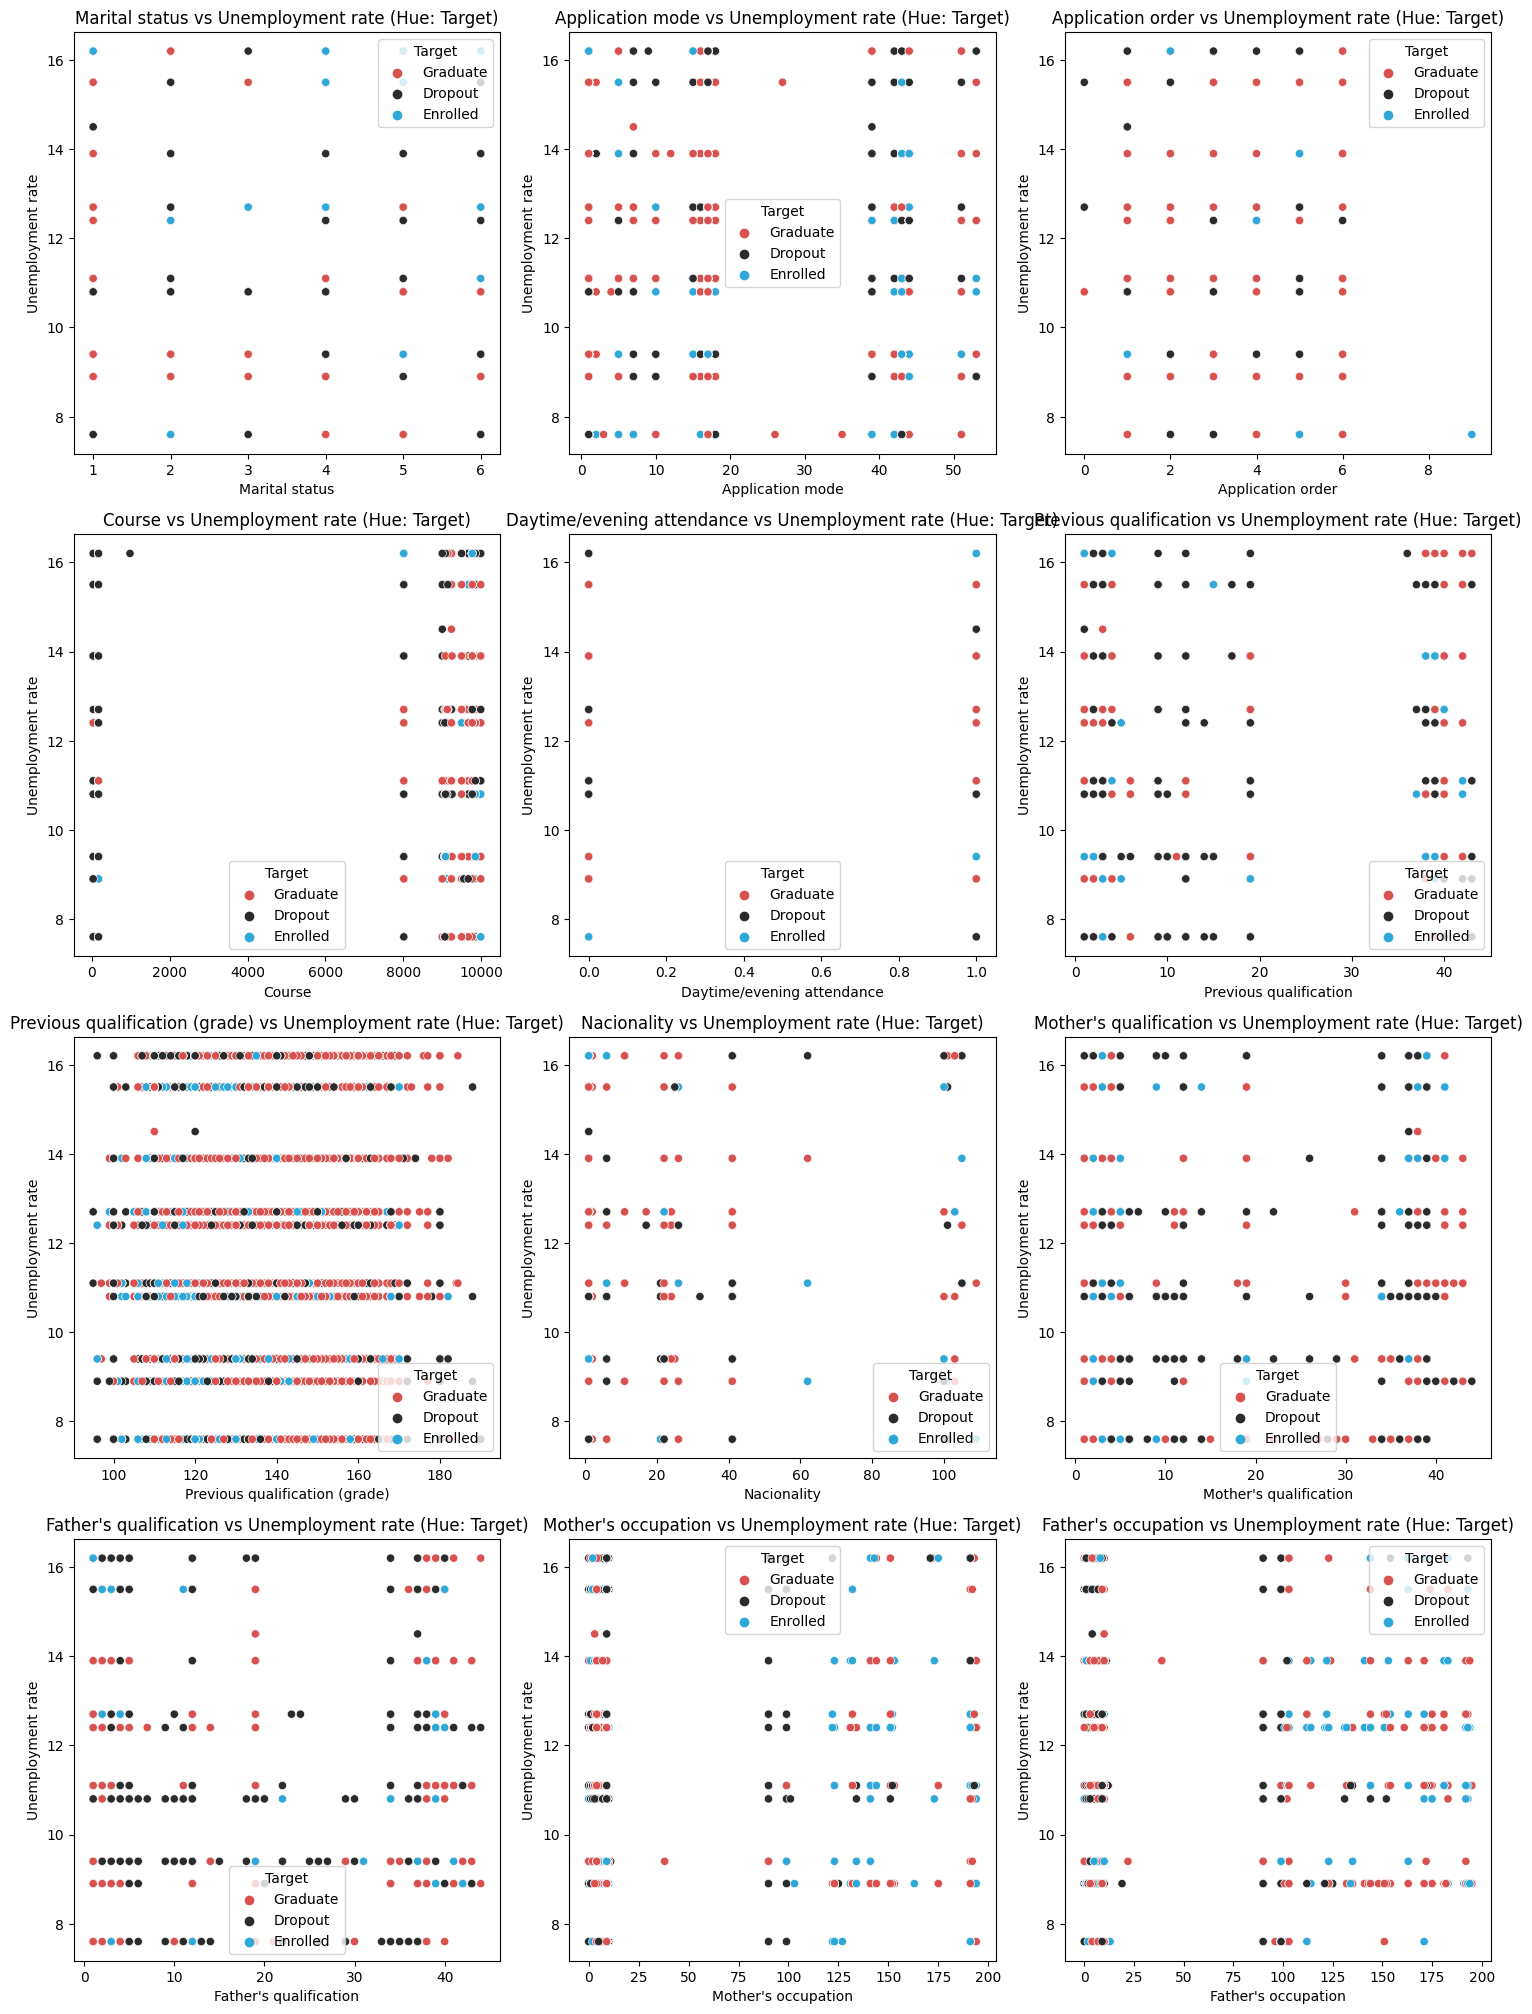


╭────────────────────────────────────────────────────────╮
│          ▲          
│          Class Wise Relation of Each-Variable          │
│          ▼          
╰────────────────────────────────────────────────────────╯


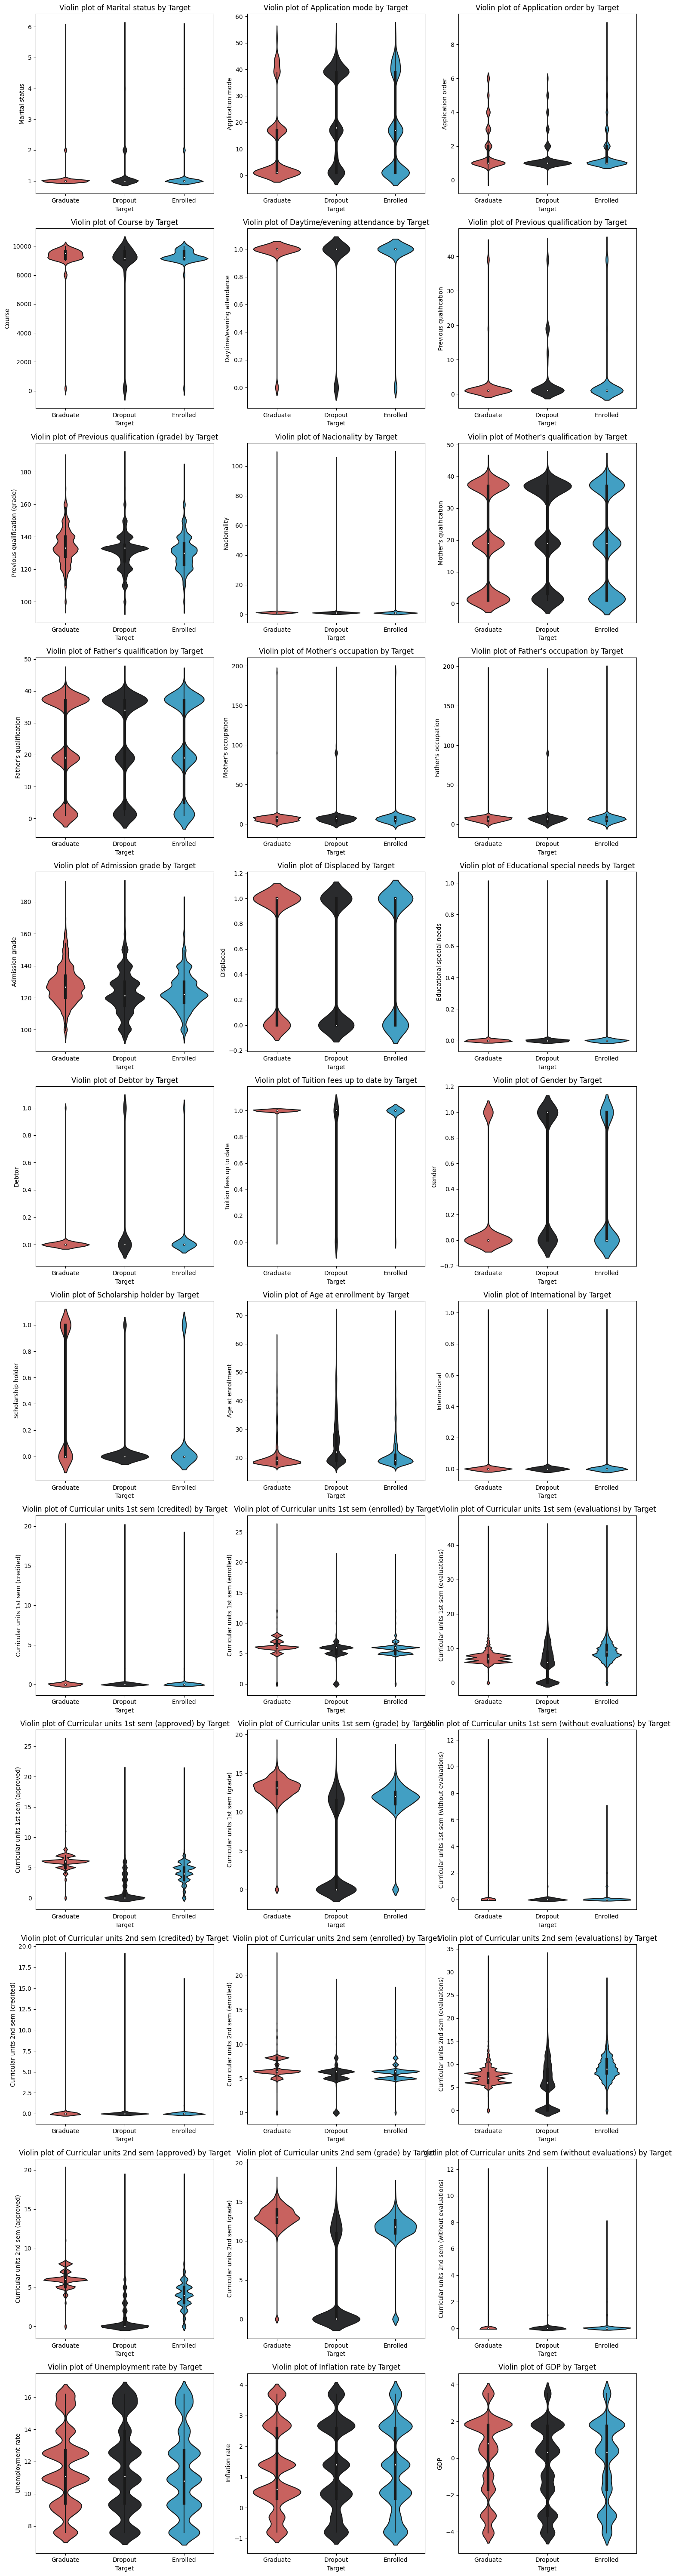


╭────────────────────────────────────────╮
│          ▲          
│          Feature Distribution          │
│          ▼          
╰────────────────────────────────────────╯


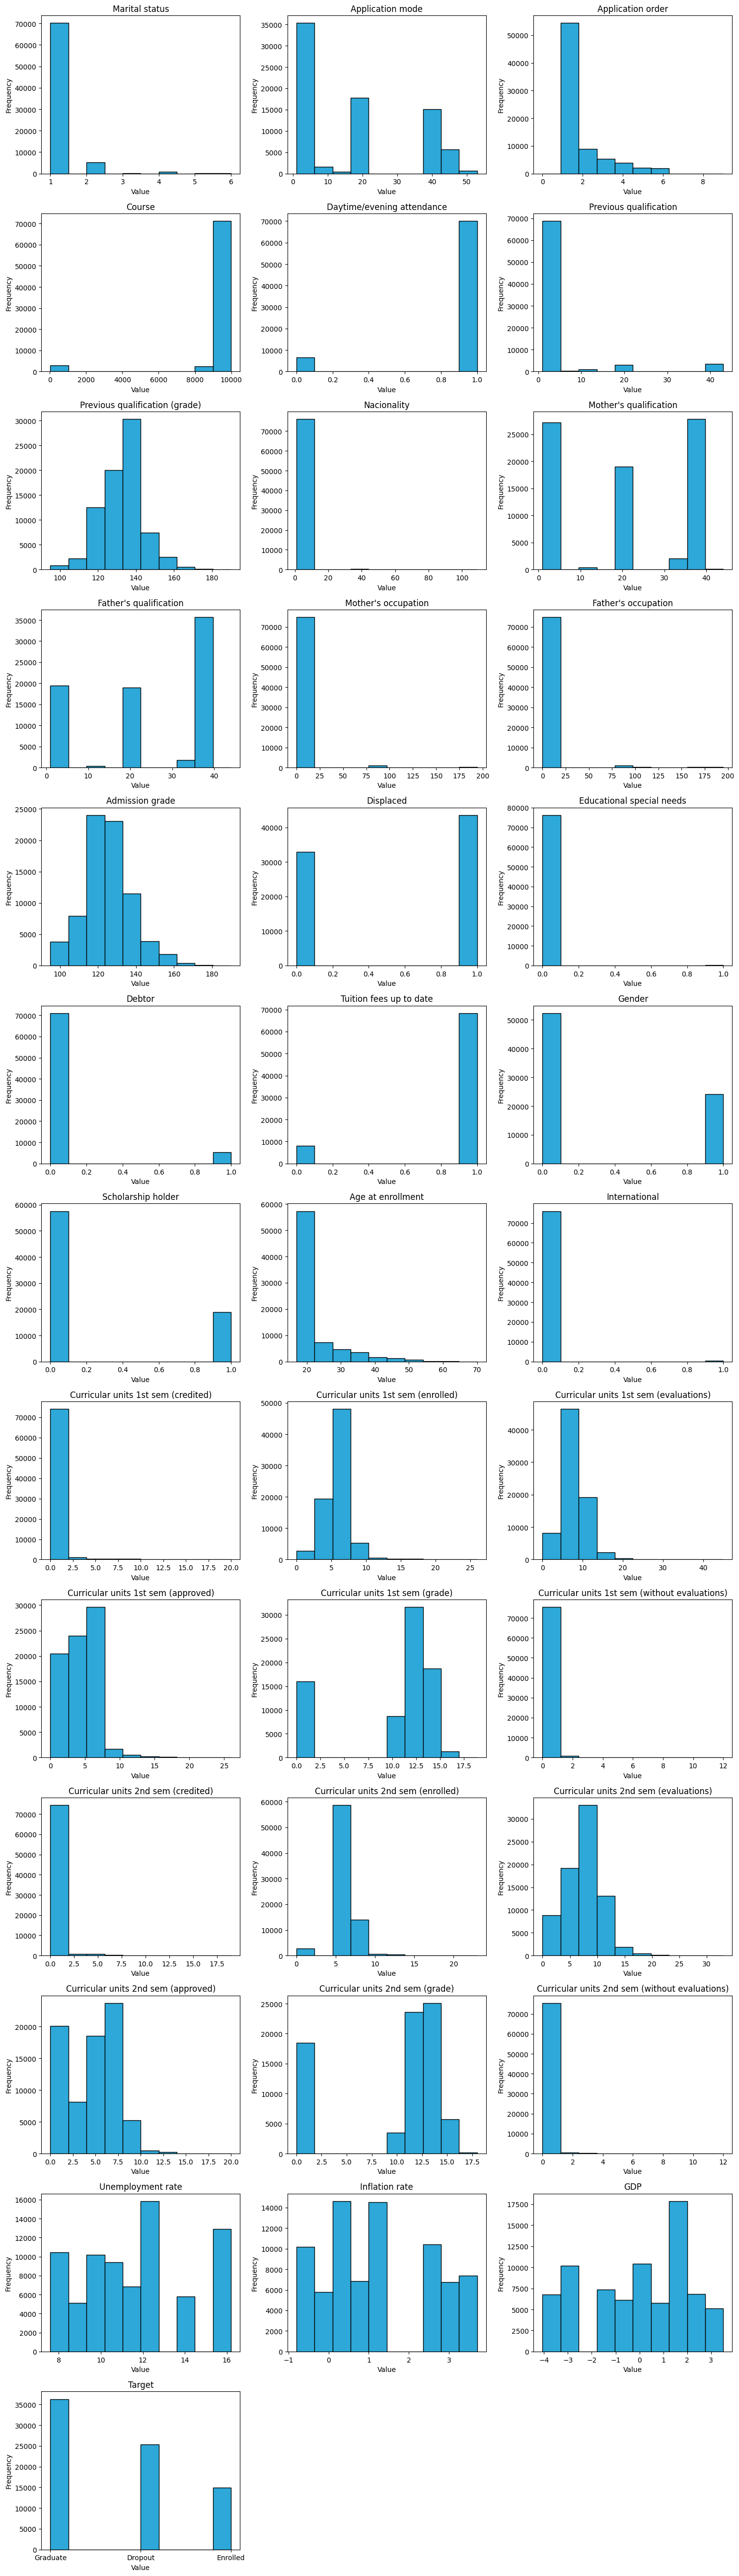


╭─────────────────────────────────────╮
│          ▲          
│          Outlier Dedection          │
│          ▼          
╰─────────────────────────────────────╯


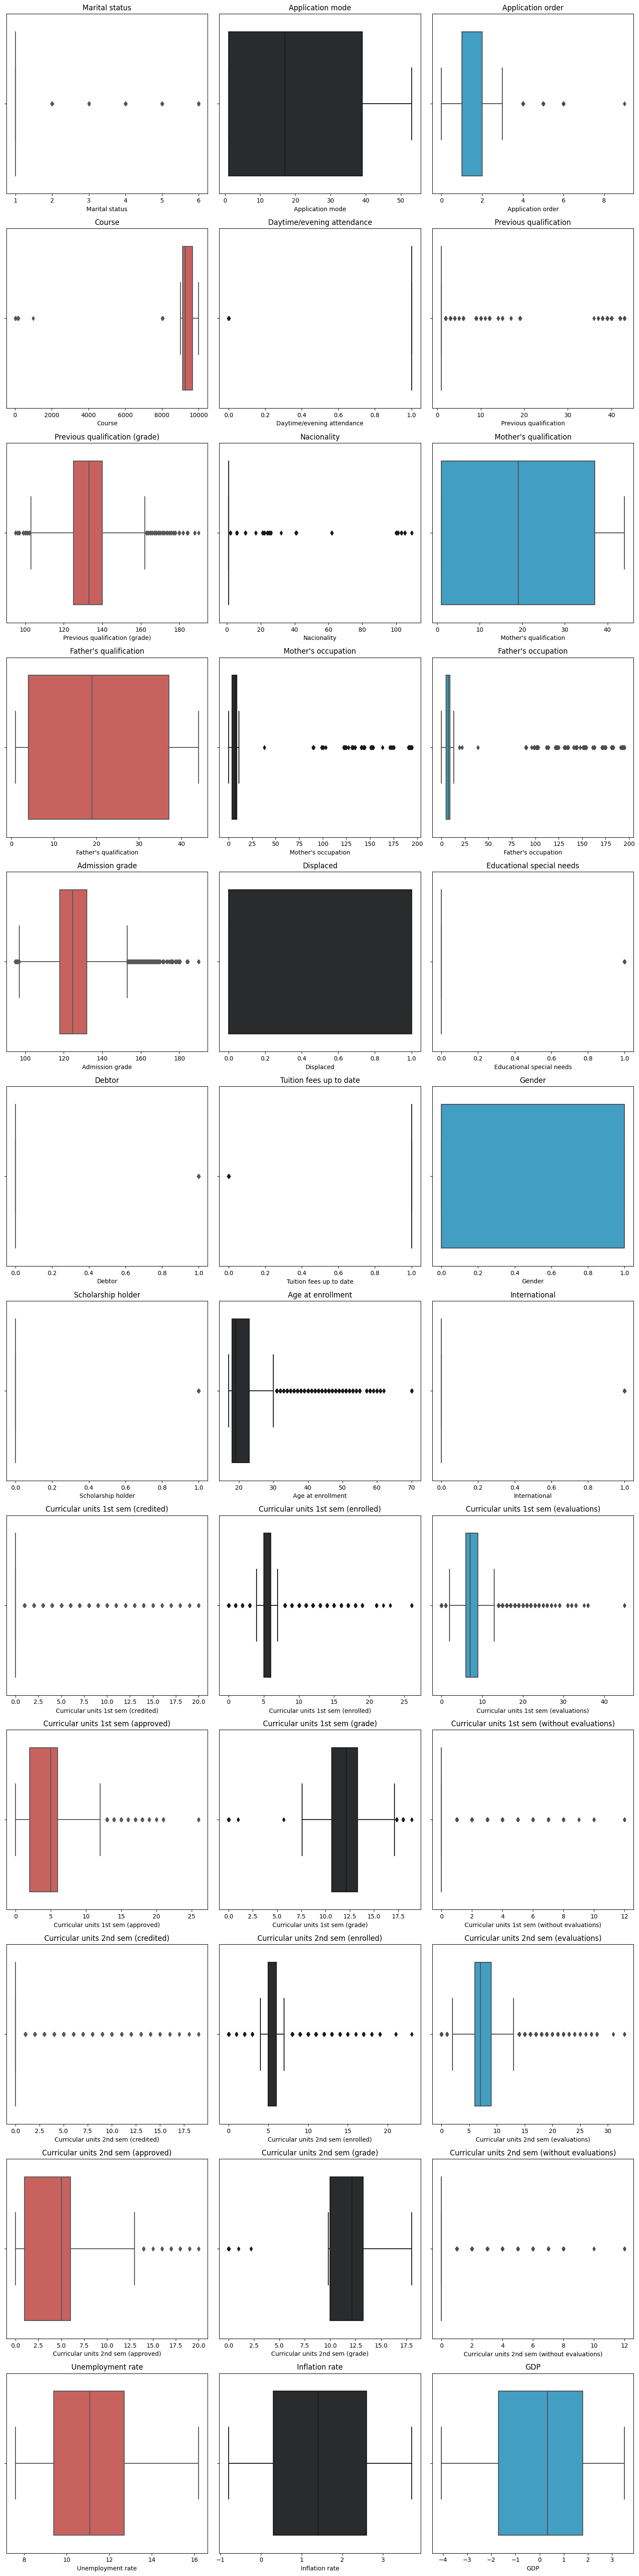


╭──────────────────────────────────────╮
│          ▲          
│          Correlation Matrix          │
│          ▼          
╰──────────────────────────────────────╯


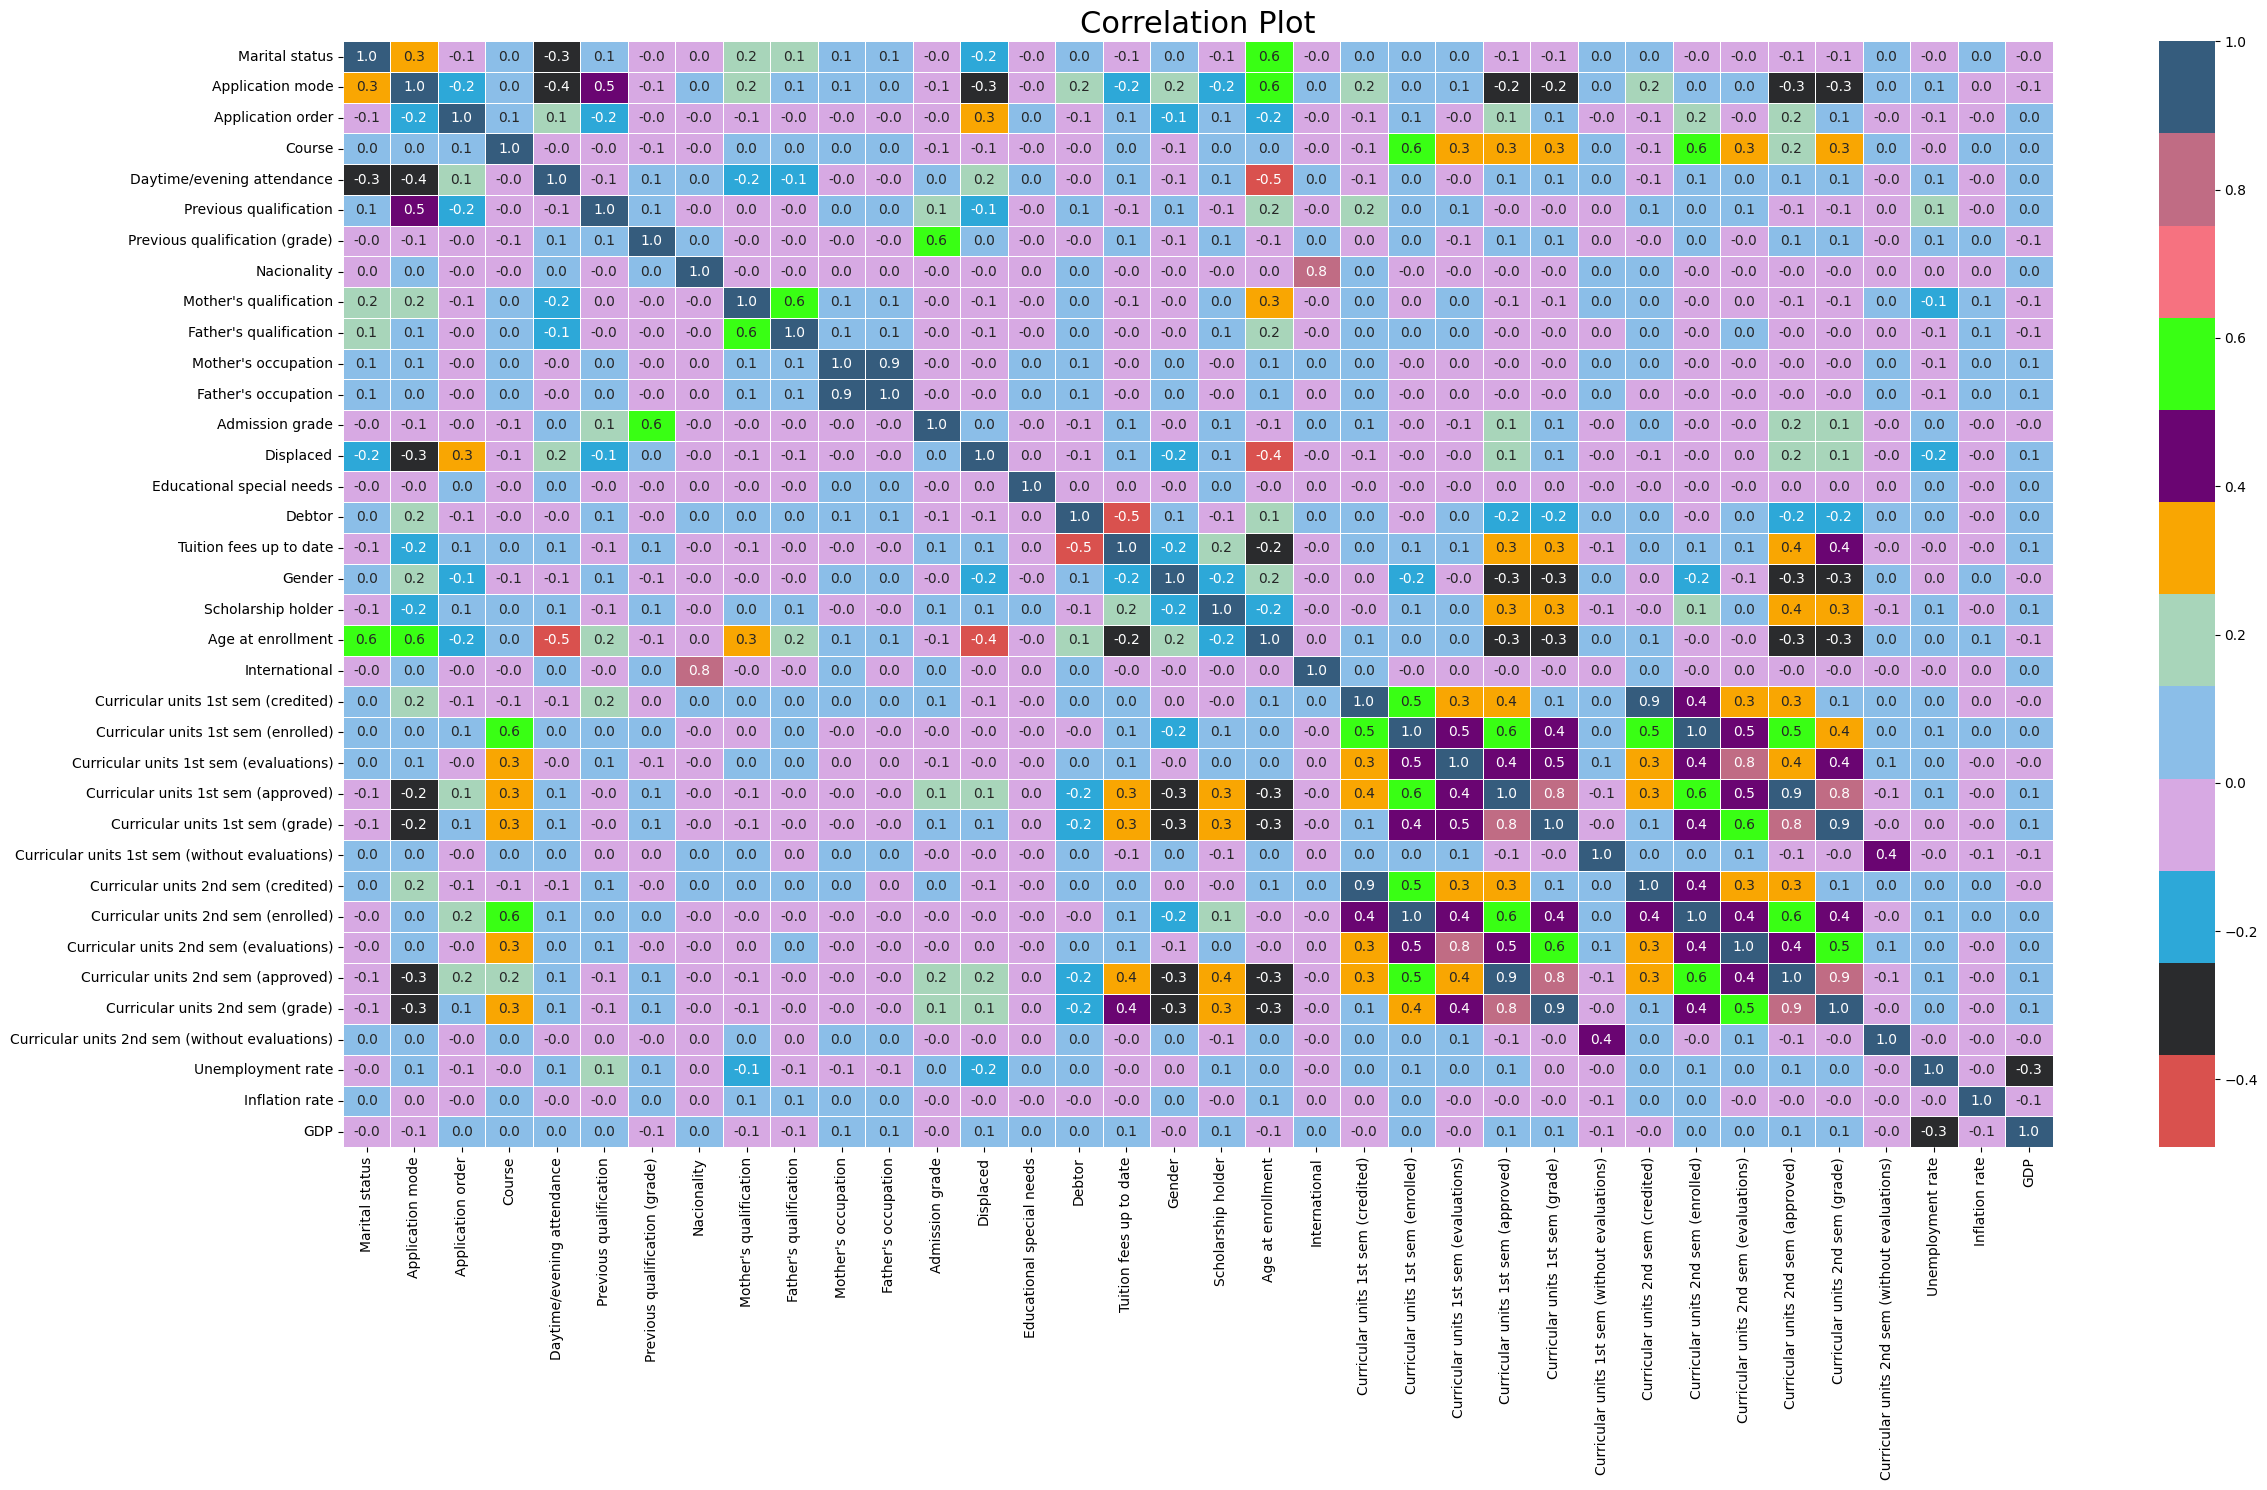

In [8]:
# Intlize The Class By Passing Data
plt_Abd = Plotting_by_Abdullah(tr_d)

# Target Ditribution
print_unique_header("Count Of Target Variable")
single_plot_distribution('Target',tr_d)

# Now we Call The Variale Class and Call The Scatter Plot Function With Custom Paramter Hue
print_unique_header('Relationship of Independent Variables With Target Variable')
# plt_Abd.scatter_plot_small('stem-height',hue ='class',palette=custom_palette)
plt_Abd.scatter_plot_small('Unemployment rate', hue='Target', palette=custom_palette)

# Now we Call The Variale Class and Call The Voilin Plot Function With Custom Paramters
print_unique_header('Class Wise Relation of Each-Variable')
plt_Abd.violin_plot('Target',palette=custom_palette)

# Now we Call The Variale Class and Call The Quick Overview Function With Custom Paramters
print_unique_header('Feature Distribution')
plt_Abd.only_HIST(tr_d.columns.tolist())
print_unique_header('Outlier Dedection')
plt_Abd.only_BOX()

print_unique_header('Correlation Matrix')

# Select only numeric columns
N_d = tr_d.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = N_d.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=palette, fmt=".1f", linewidths=0.5)
plt.title('Correlation Plot', fontsize=22)  
plt.tight_layout()  
plt.show()

<div style='border: 3px solid none; background-color: #D9514E ;padding:20px;'>
    <h1 style ='color : #E6E6FA ; font-weight: bold'>Function Overview</h1>
    <p style="font-family: Century Gothic; font-size: 18px;color : #E6E6FA ">
        The provided code generates a pair plot using Seaborn's <code>pairplot</code> function to visualize the relationships between multiple variables in a DataFrame.
        <br><br>
        The function takes the following parameters:
        <br><br>
        - <code>data_to_plot</code>: A DataFrame containing the columns to be plotted.
        <br>
        - <code>hue='Target'</code>: Specifies the column to be used for coloring the data points.
        <br>
        - <code>palette=Q_colors</code>: A dictionary that maps colors to unique values of the 'Target' column, providing custom colors for each category.
        <br><br>
        The pair plot provides a grid of scatterplots for each pair of variables, with the diagonal showing the distribution of each variable. The points in the scatterplots are colored according to the 'Target' variable, allowing for visual inspection of relationships and patterns.
    </p>
</div>


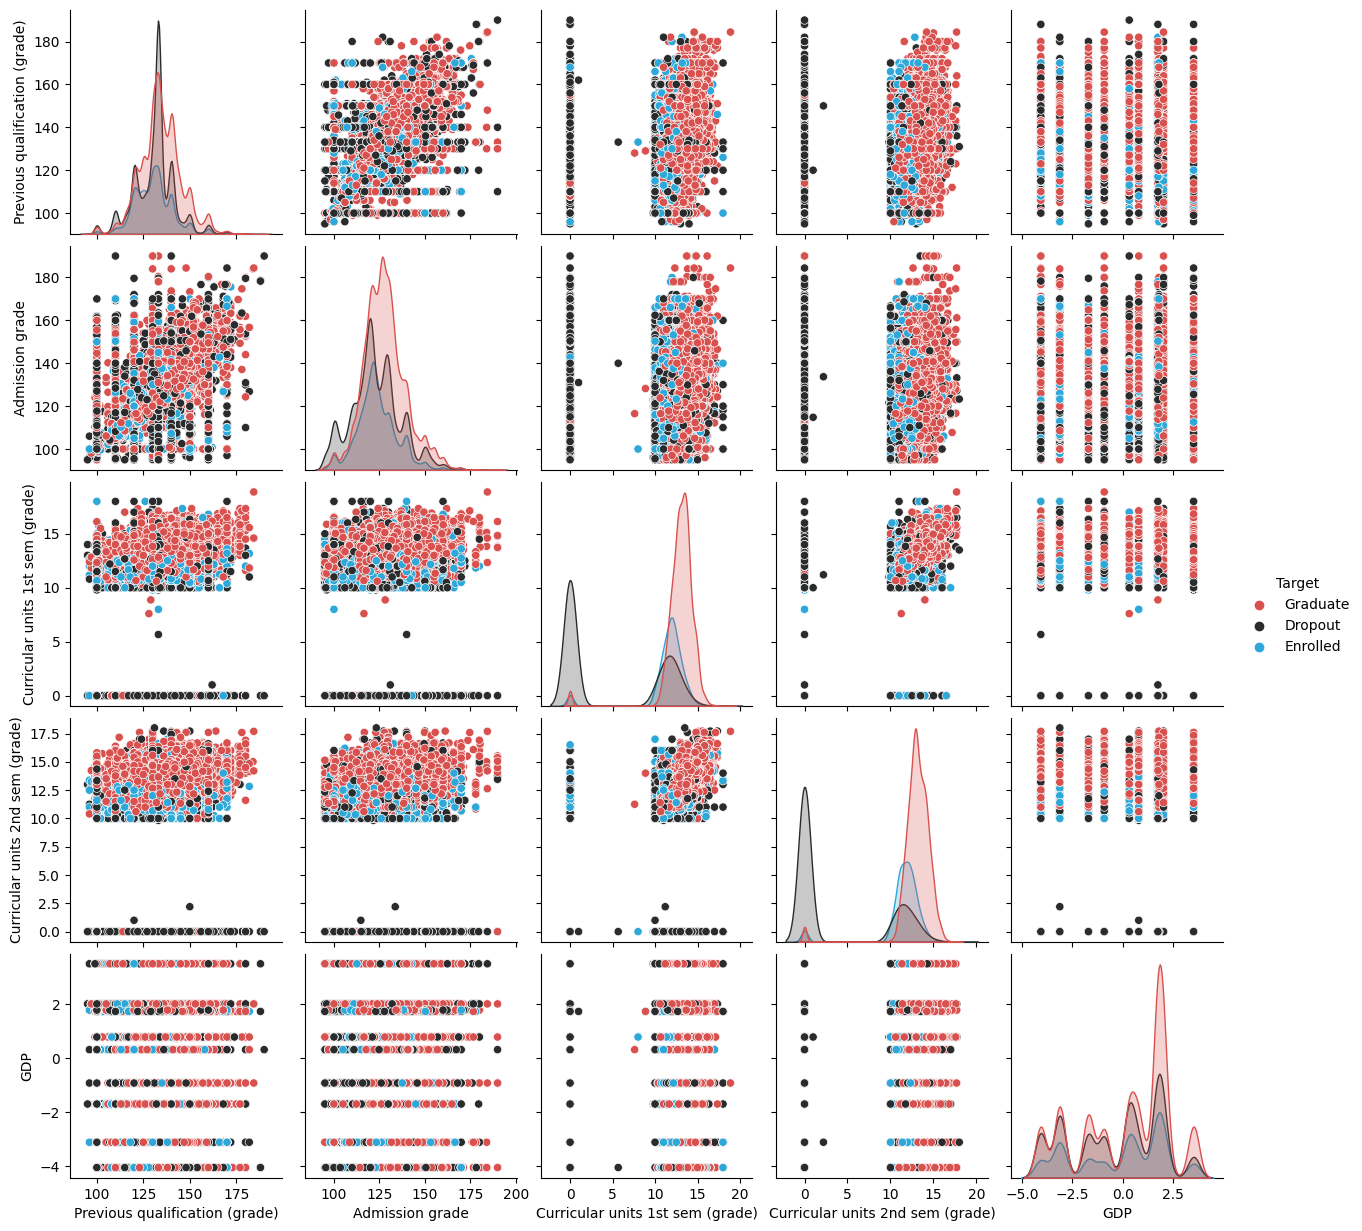

In [13]:
# Cols to Plot 
columns_to_plot = ['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'GDP','Target']

# Data Columns
data_to_plot = tr_d[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Quality' column
Q_colors = {'Graduate': palette[0], 'Dropout': palette[1],'Enrolled': palette[2],'other': 'gray'}  

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Target', palette=Q_colors)
plt.show()

# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">Model Building || Preprocessing</p>

<div style='border: 3px solid none; background-color: #D9514E ;padding:20px;'>
    <h1 style ='color : #E6E6FA ; font-weight: bold'>Function Overview</h1>
    <p style="font-family: Century Gothic; font-size: 18px;color : #E6E6FA ">
        The provided code defines a class named <code>Abdullah_Auto_Ml</code> for automating machine learning tasks. It includes methods for data preprocessing, feature scaling, encoding, splitting, training, and evaluating machine learning models.
        <br><br>
        Key functionalities include:
        <ul style="list-style-type:disc; margin-left: 20px;">
            <li>Scaling and encoding of features.</li>
            <li>Splitting data into training and testing sets.</li>
            <li>Training machine learning models using k-fold cross-validation.</li>
            <li>Evaluating models for both classification and regression tasks.</li>
        </ul>
        Each method performs specific tasks such as scaling, encoding, splitting, training, and evaluation, providing a comprehensive pipeline for automating the machine learning workflow.
    </p>
</div>


In [26]:
# Auto Class
class Abdullah_Auto_Ml:
    def __init__(self, DATA,border_color=HEAD, style_color=TEXT):
        """
        Initialize Abdullah_Auto_Ml class with the input data.

        Args:
        - DATA: Input DataFrame.
        """
        self.DATA = DATA
        self.scaled_data = None
        self.encoded_data = None
        
        # Initialize border and style colors as class attributes
        self.border_color = border_color
        self.style_color = style_color
        
        # Print unique header
        print_unique_header("Data Loaded")
        # Print boxed zigzag heading for head of data
        print_boxed_zigzag_heading('Head Of Data')
        # Display the first 5 rows of the data in HTML format with custom styling
        display(HTML(self.DATA.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {self.border_color};">').replace('<td>', f'<td style="color: {self.style_color};">')))

    def apply_scaling(self, columns, scaler_type):
        """
        Apply scaling to the specified columns of the data.

        Args:
        - columns: List of column names to scale.
        - scaler_type: Type of scaler to use ('S' for StandardScaler, 'M' for MinMaxScaler, 'Q' for QuantileTransformer).

        Returns:
        - Scaled DataFrame.
        """
        Scaled_D = self.DATA.copy()
        if scaler_type == 'S':
            scaler = StandardScaler()
        elif scaler_type == 'M':
            scaler = MinMaxScaler()
        elif scaler_type == 'Q':
            scaler = QuantileTransformer(output_distribution='normal')
        else:
            raise ValueError("Invalid scaler type. Choose 'S' for StandardScaler, 'M' for MinMaxScaler, or 'Q' for QuantileTransformer.")

        for col in columns:
            Scaled_D[col] = scaler.fit_transform(Scaled_D[[col]])
        
        # Print unique header
        print_unique_header("Data Scaled")
        # Print boxed zigzag heading for head of scaled data
        print_boxed_zigzag_heading('Head Of Scaled Data')
        # Display the first 5 rows of scaled data in HTML format with custom styling
        display(HTML(Scaled_D.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {self.border_color};">').replace('<td>', f'<td style="color: {self.style_color};">')))

        self.scaled_data = Scaled_D
        return Scaled_D

    def E_D(self, Scaled_D, columns, method='L'):
        """
        Encode categorical variables in the data.

        Args:
        - Scaled_D: Scaled DataFrame.
        - columns: List of column names to encode.
        - method: Encoding method ('L' for LabelEncoder, 'D' for One-Hot Encoding).

        Returns:
        - Encoded DataFrame.
        """
        Encode_D = Scaled_D.copy()

        if method == 'L':
            L_E = LabelEncoder()
            for col in columns:
                Encode_D[col] = L_E.fit_transform(Encode_D[col])

        elif method == 'D':
            dummy_cols = pd.get_dummies(Encode_D[columns], prefix=columns)
            Encode_D = pd.concat([Encode_D, dummy_cols], axis=1)
            Encode_D = Encode_D.drop(columns, axis=1)

        else:
            raise ValueError("Invalid method! Please choose either 'L' or 'D'.")

        self.encoded_data = Encode_D
        # Print unique header
        print_unique_header("Data Encoded")
        # Print boxed zigzag heading for head of encoded data
        print_boxed_zigzag_heading('Head Of Encoded Data')
        # Display the first 5 rows of encoded data in HTML format with custom styling
        display(HTML(Encode_D.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {self.border_color};">').replace('<td>', f'<td style="color: {self.style_color};">')))

        return Encode_D , L_E

    def Split_X_y(self, data_type, Target):
        """
        Split data into features (X) and target variable (y).

        Args:
        - data_type: Type of data to split ('encoded', 'scaled', or 'original').
        - Target: Name of the target variable.

        Returns:
        - X: Features DataFrame.
        - y: Target Series.
        """
        if data_type == 'encoded':
            if self.encoded_data is None:
                raise ValueError("Encoded data is not available. Please encode the data first.")
            X = self.encoded_data.drop(Target, axis=1)
            y = self.encoded_data[Target]
        elif data_type == 'scaled':
            if self.scaled_data is None:
                raise ValueError("Scaled data is not available. Please scale the data first.")
            X = self.scaled_data.drop(Target, axis=1)
            y = self.scaled_data[Target]
        elif data_type == 'original':
            X = self.DATA.drop(Target, axis=1)
            y = self.DATA[Target]
        else:
            raise ValueError("Invalid data type. Choose 'encoded', 'scaled', or 'original'.")
        
        # Print unique header
        print_unique_header("Data Split into X and y")
        # Print boxed zigzag heading for head of X
        print_boxed_zigzag_heading('Head Of X ')
        # Display the first 5 rows of X in HTML format with custom styling
        display(HTML(X.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {self.border_color};">').replace('<td>', f'<td style="color: {self.style_color};">')))
        # Print boxed zigzag heading for head of y
        print_boxed_zigzag_heading('Head Of y')
        # Display the first few rows of y in HTML format with custom styling
        display(HTML(y.head().to_frame().to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {self.border_color};">').replace('<td>', f'<td style="color: {self.style_color};">')))

        return X, y

    def Train_Test(self, X, y, N_FOLDS):
        """
        Split data into training and testing sets using k-fold cross-validation.

        Args:
        - X: Features DataFrame.
        - y: Target Series.
        - N_FOLDS: Number of folds for cross-validation.

        Returns:
        - X_train: Training features.
        - X_test: Testing features.
        - y_train: Training target.
        - y_test: Testing target.
        """
        kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=1)

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Print unique header
        print_unique_header("Data Splitted Into Train Test")
        # Print boxed zigzag heading for head of train data
        print_boxed_zigzag_heading('Head Of Train Data')
        # Display the first 5 rows of training data in HTML format with custom styling
        display(HTML(X_train.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {self.border_color};">').replace('<td>', f'<td style="color: {self.style_color};">')))

        # Print boxed zigzag heading for head of test data
        print_boxed_zigzag_heading('Head Of Test Data')
        # Display the first 5 rows of testing data in HTML format with custom styling
        display(HTML(X_test.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', f'<table style="border: 2px solid {self.border_color};">').replace('<td>', f'<td style="color: {self.style_color};">')))
        
        return X_train, X_test, y_train, y_test

    def Train_ML(self, Model,Type,N_FOLDS ,X_train, X_test, y_train, y_test):
        """
        Train a machine learning model using k-fold cross-validation, and evaluate it on the test set.

        Args:
        - Model: Machine learning model object.
        - N_FOLDS: Number of folds for cross-validation.
        - X_train: Training features.
        - X_test: Testing features.
        - y_train: Training target.
        - y_test: Testing target.
        """
        # Define your model
        MODEL = Model

        # Initialize a k-fold cross-validation splitter
        kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

        # Perform k-fold cross-validation
        cv_scores = cross_val_score(MODEL, X, y, cv=kf)

        # Fit the model on the entire training data
        MODEL.fit(X_train, y_train)

        # Predict on the test set
        y_PRED = MODEL.predict(X_test)
        
        # If - Else to Pick The Evaluate 
        if Type == 'Classification':
            def evaluate_C(y_pred, y_test):
                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')

                # Print boxed zigzag headings for metrics
                print_boxed_zigzag_heading(f"Accuracy: {accuracy:.4f}")
                print_boxed_zigzag_heading(f"Precision: {precision:.4f}")
                print_boxed_zigzag_heading(f"Recall: {recall:.4f}")
                print_boxed_zigzag_heading(f"F1 Score: {f1:.4f}")

                # Calculate confusion matrix
                cm = confusion_matrix(y_test, y_pred)

                # Print boxed zigzag heading for confusion matrix
                print_boxed_zigzag_heading("Confusion Matrix:")

                # Create a custom colormap
                custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette, N=256)

                # Plot confusion matrix with custom colormap
                plt.figure(figsize=(20, 10))
                sns.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap, cbar=False)
                plt.xlabel("Predicted labels")
                plt.ylabel("True labels")
                plt.title("Confusion Matrix")
                plt.show()
            evaluate_C(y_PRED, y_test)
        if Type == 'Regression':
            def evaluate_R(y_pred, y_test):
                # Calculate regression metrics
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, y_pred)

                # Print boxed zigzag headings for metrics
                print_boxed_zigzag_heading(f"Mean Absolute Error (MAE): {mae:.4f}")
                print_boxed_zigzag_heading(f"Mean Squared Error (MSE): {mse:.4f}")
                print_boxed_zigzag_heading(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
                print_boxed_zigzag_heading(f"R-squared (R²): {r2:.4f}")

                # Create a custom colormap
                custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette, N=256)

                # Plot predictions vs actual values with custom colormap
                plt.figure(figsize=(20, 10))
                scatter = plt.scatter(y_test, y_pred, c=np.abs(y_test - y_pred), cmap=custom_cmap)
                plt.colorbar(scatter, label='Absolute Error')
                plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line y=x for reference
                plt.xlabel("Actual Values")
                plt.ylabel("Predicted Values")
                plt.title("Actual vs Predicted Values")
                plt.show()
            evaluate_R(y_PRED,y_test)
        return MODEL
print_unique_header("Function Intiltized")


╭───────────────────────────────────────╮
│          ▲          
│          Function Intiltized          │
│          ▼          
╰───────────────────────────────────────╯



╭───────────────────────────────╮
│          ▲          
│          Data Loaded          │
│          ▼          
╰───────────────────────────────╯

╭────────────────────────────────╮
│ Head │ Of │ Data │
╰────────────────────────────────╯



╭───────────────────────────────╮
│          ▲          
│          Data Scaled          │
│          ▼          
╰───────────────────────────────╯

╭───────────────────────────────────────╮
│ Head │ Of │ Scaled │ Data │
╰───────────────────────────────────────╯



╭────────────────────────────────╮
│          ▲          
│          Data Encoded          │
│          ▼          
╰────────────────────────────────╯

╭────────────────────────────────────────╮
│ Head │ Of │ Encoded │ Data │
╰────────────────────────────────────────╯



╭───────────────────────────────────────────╮
│          ▲          
│          Data Split into X and y          │
│          ▼          
╰───────────────────────────────────────────╯

╭──────────────────────────────╮
│ Head │ Of │ X │
╰──────────────────────────────╯



╭─────────────────────────────╮
│ Head │ Of │ y │
╰─────────────────────────────╯



╭─────────────────────────────────────────────────╮
│          ▲          
│          Data Splitted Into Train Test          │
│          ▼          
╰─────────────────────────────────────────────────╯

╭──────────────────────────────────────╮
│ Head │ Of │ Train │ Data │
╰──────────────────────────────────────╯



╭─────────────────────────────────────╮
│ Head │ Of │ Test │ Data │
╰─────────────────────────────────────╯



╭─────────────────────────────────╮
│          ▲          
│          XGBClassifier          │
│          ▼          
╰─────────────────────────────────╯

╭────────────────────────────────────╮
│ Accuracy: │ 0.8341 │
╰────────────────────────────────────╯

╭─────────────────────────────────────╮
│ Precision: │ 0.8321 │
╰─────────────────────────────────────╯

╭──────────────────────────────────╮
│ Recall: │ 0.8341 │
╰──────────────────────────────────╯

╭────────────────────────────────────╮
│ F1 │ Score: │ 0.8318 │
╰────────────────────────────────────╯

╭─────────────────────────────────────╮
│ Confusion │ Matrix: │
╰─────────────────────────────────────╯


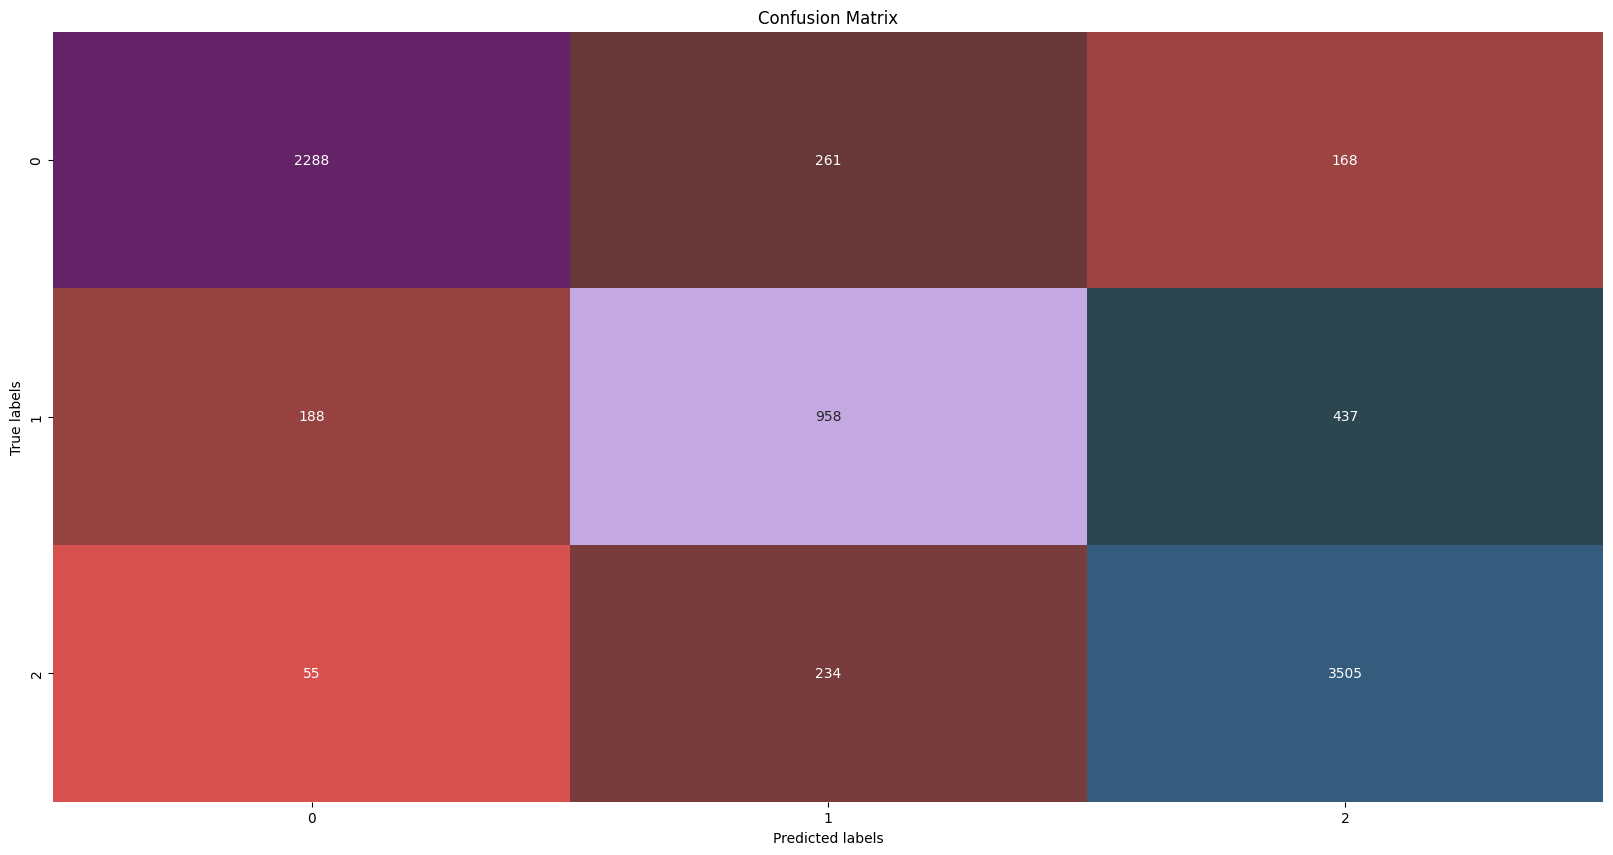


╭───────────────────────────────────╮
│          ▲          
│          LGBM Classifier          │
│          ▼          
╰───────────────────────────────────╯

╭────────────────────────────────────╮
│ Accuracy: │ 0.8365 │
╰────────────────────────────────────╯

╭─────────────────────────────────────╮
│ Precision: │ 0.8347 │
╰─────────────────────────────────────╯

╭──────────────────────────────────╮
│ Recall: │ 0.8365 │
╰──────────────────────────────────╯

╭────────────────────────────────────╮
│ F1 │ Score: │ 0.8343 │
╰────────────────────────────────────╯

╭─────────────────────────────────────╮
│ Confusion │ Matrix: │
╰─────────────────────────────────────╯


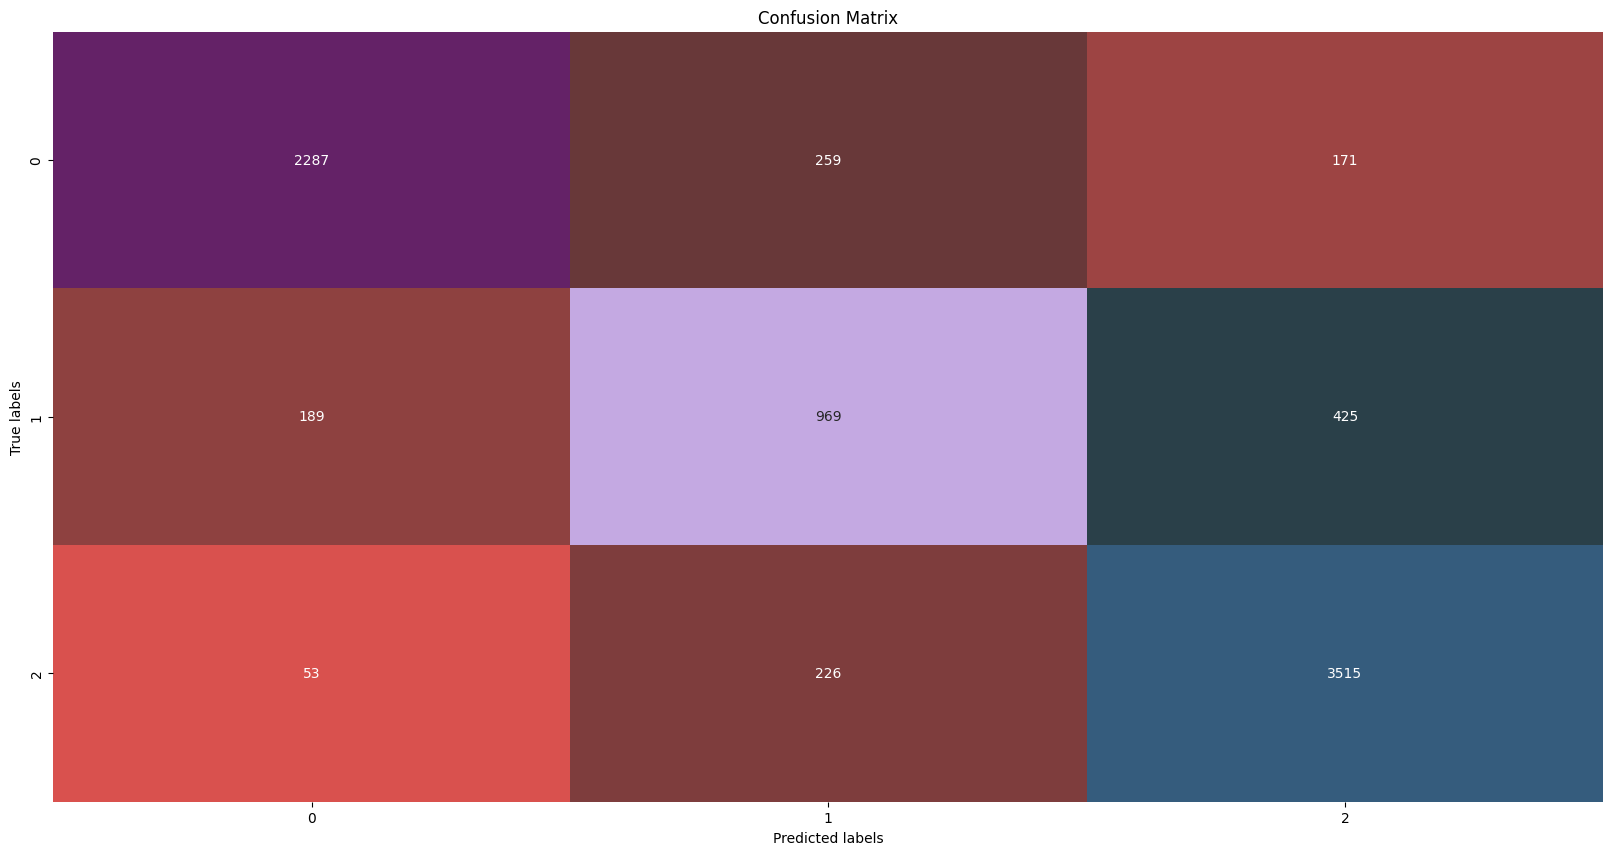


╭───────────────────────────────────────╮
│          ▲          
│          CatBoost Classifier          │
│          ▼          
╰───────────────────────────────────────╯

╭────────────────────────────────────╮
│ Accuracy: │ 0.8226 │
╰────────────────────────────────────╯

╭─────────────────────────────────────╮
│ Precision: │ 0.8199 │
╰─────────────────────────────────────╯

╭──────────────────────────────────╮
│ Recall: │ 0.8226 │
╰──────────────────────────────────╯

╭────────────────────────────────────╮
│ F1 │ Score: │ 0.8191 │
╰────────────────────────────────────╯

╭─────────────────────────────────────╮
│ Confusion │ Matrix: │
╰─────────────────────────────────────╯


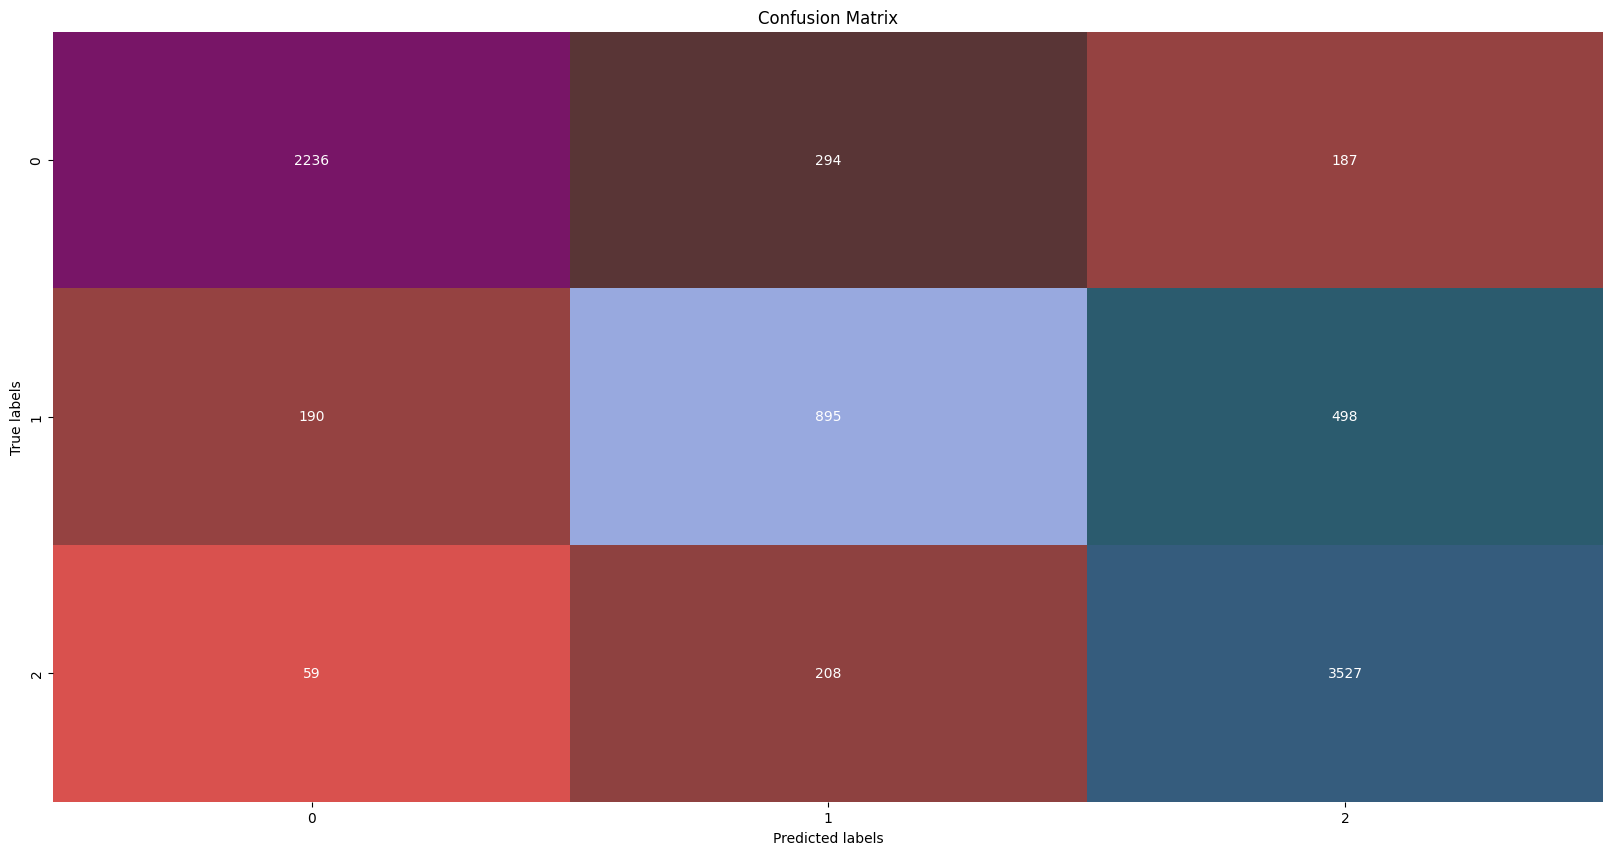

In [29]:
# Intitlize The Class
auto_ml = Abdullah_Auto_Ml(tr_d)

# Scale Data
SC_D = auto_ml.apply_scaling(['Course', 'Previous qualification (grade)', 'Admission grade','Age at enrollment'
                             ,'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','GDP'], scaler_type='M')

# Encode data
En_D , L_E = auto_ml.E_D(Scaled_D=SC_D, columns=['Target'], method='L')

# Split X and y
X, y = auto_ml.Split_X_y('encoded',Target='Target')

# Train Test 
X_TR, X_VAL, Y_TR, Y_VAL = auto_ml.Train_Test(X,y,10)

# Train Auto ML RF
print_unique_header("XGBClassifier")
# Train Auto ML Decision Tree
X_M = auto_ml.Train_ML(XGBClassifier(random_state=42),
                 'Classification',5 ,X_TR,
                 X_VAL, Y_TR, Y_VAL)

print_unique_header("LGBM Classifier")
# Train Auto ML LGBM
L_M = auto_ml.Train_ML(lgb.LGBMClassifier(random_state=42,verbose=-1,objective='multiclass',**lgbm_params),
                 'Classification',10 ,X_TR,
                 X_VAL, Y_TR, Y_VAL)

print_unique_header("CatBoost Classifier")
# Train Auto ML
C_M = auto_ml.Train_ML(CatBoostClassifier(learning_rate=0.01, verbose=0,iterations=300),
                 'Classification',5 ,X_TR,
                 X_VAL, Y_TR, Y_VAL)

# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">Submission Files</p>

In [31]:
# Intitlize The Class
auto_ml_TE = Abdullah_Auto_Ml(te_d)

# Scale Test Data 
te_d = auto_ml_TE.apply_scaling(['Course', 'Previous qualification (grade)', 'Admission grade','Age at enrollment'
                             ,'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','GDP'], scaler_type='M')


╭───────────────────────────────╮
│          ▲          
│          Data Loaded          │
│          ▼          
╰───────────────────────────────╯

╭────────────────────────────────╮
│ Head │ Of │ Data │
╰────────────────────────────────╯



╭───────────────────────────────╮
│          ▲          
│          Data Scaled          │
│          ▼          
╰───────────────────────────────╯

╭───────────────────────────────────────╮
│ Head │ Of │ Scaled │ Data │
╰───────────────────────────────────────╯


In [32]:
print_unique_header("XGB Submission")
# # Test Pred 
# X_Pred = X_M.predict(te_d)
# # Making Submission File 
# d_s['Target'] = L_E.inverse_transform(X_Pred)
# d_s.to_csv('X_SUB.csv', index=False)

print_unique_header("LGBM Submission")
# Fit on Full Data 
L_M.fit(X,y)
# Test Pred 
L_Pred = L_M.predict(te_d)
# Making Submission File 
d_s['Target'] = L_E.inverse_transform(L_Pred)
d_s.to_csv('L_Submission1.csv', index=False)

print_unique_header("CatBoost Submission")
# # Test Pred 
# C_Pred = C_M.predict(te_d)
# # Making Submission File 
# d_s['Target'] = L_E.inverse_transform(C_Pred)
# d_s.head()
# d_s.to_csv('C_SUB.csv', index=False)


╭──────────────────────────────────╮
│          ▲          
│          XGB Submission          │
│          ▼          
╰──────────────────────────────────╯

╭───────────────────────────────────╮
│          ▲          
│          LGBM Submission          │
│          ▼          
╰───────────────────────────────────╯

╭───────────────────────────────────────╮
│          ▲          
│          CatBoost Submission          │
│          ▼          
╰───────────────────────────────────────╯


# <p style="background-color: #D9514E; font-family:Pacifico; color:#E6E6FA; font-size:200%; text-align:center; border-radius:0%;">The End</p>

<div style='border: 3px solid none; background-color: #D9514E ;padding:20px;'>
    <h1 style ='color : #E6E6FA ; font-weight: bold'>Closing Words</h1>
    <p style="font-family: Century Gothic; font-size: 18px;color : #E6E6FA ">
        Thank you for exploring this version of the automated machine learning Class Starter! I hope you found it useful for your data analysis and modeling tasks. Stay tuned for the upcoming second version, which will include optimized modeling techniques and additional features Engineering to enhance your machine learning workflows.
        <br><br>
        I am  constantly working to improve and innovate, so your feedback and suggestions are always welcome. If you have any questions or ideas for improvements, feel free to reach out. Happy modeling!
    </p>
</div>